### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
# prompt: Con DataFrame tienda: suggest a plot

import altair as alt

# Crea un gráfico de dispersión que muestre la relación entre el precio y el costo de envío, coloreado por categoría de producto.
alt.Chart(tienda).mark_point().encode(
    x='Precio',
    y='Costo de envío',
    color='Categoría del Producto',
    tooltip=['Producto', 'Precio', 'Costo de envío', 'Categoría del Producto']
).interactive()


alt.Chart(...)

# 1.- Tiempo en operación de las tiendas

In [6]:
import pandas as pd

# Cargar los datos de las tiendas desde las URLs
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer los archivos CSV usando pandas
tienda_1 = pd.read_csv(url_tienda1)
tienda_2 = pd.read_csv(url_tienda2)
tienda_3 = pd.read_csv(url_tienda3)
tienda_4 = pd.read_csv(url_tienda4)

# Convertir la columna 'Fecha de Compra' a tipo datetime para cada DataFrame
tienda_1['Fecha de Compra'] = pd.to_datetime(tienda_1['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda_2['Fecha de Compra'] = pd.to_datetime(tienda_2['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda_3['Fecha de Compra'] = pd.to_datetime(tienda_3['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda_4['Fecha de Compra'] = pd.to_datetime(tienda_4['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')

# Función para encontrar la tienda más antigua
def encontrar_tienda_mas_antigua(tiendas):
    """
    Encuentra la tienda con la venta más antigua.

    Args:
        tiendas (list): Una lista de DataFrames de tiendas.

    Returns:
        tuple: El nombre de la tienda más antigua y la fecha de su venta más antigua.
               Retorna (None, None) si no hay tiendas o si hay un error.
    """
    tienda_mas_antigua = None
    fecha_mas_antigua = None
    fechas_de_inicio = [] # Inicializa una lista para guardar las fechas de inicio de cada tienda

    for nombre_tienda, tienda_df in tiendas:
        # Verifica si el DataFrame está vacío o si la columna 'Fecha de Compra' no existe
        if tienda_df.empty or 'Fecha de Compra' not in tienda_df.columns:
            print(f"Advertencia: La tienda {nombre_tienda} no tiene datos de ventas o la columna 'Fecha de Compra' no existe.")
            fechas_de_inicio.append((nombre_tienda, None))  # Agrega la tienda con fecha de inicio None
            continue  # Pasa a la siguiente tienda

        # Elimina las filas donde 'Fecha de Compra' es nulo
        tienda_df = tienda_df.dropna(subset=['Fecha de Compra'])

        # Verifica nuevamente si el DataFrame está vacío después de eliminar nulos
        if tienda_df.empty:
            print(f"Advertencia: La tienda {nombre_tienda} no tiene datos de ventas válidos después de eliminar fechas nulas.")
            fechas_de_inicio.append((nombre_tienda, None))  # Agrega la tienda con fecha de inicio None
            continue  # Pasa a la siguiente tienda

        fecha_de_venta_mas_antigua_de_la_tienda = tienda_df['Fecha de Compra'].min()
        fechas_de_inicio.append((nombre_tienda, fecha_de_venta_mas_antigua_de_la_tienda)) # Agrega la tienda y su fecha de inicio a la lista
        if fecha_mas_antigua is None or fecha_de_venta_mas_antigua_de_la_tienda < fecha_mas_antigua:
            fecha_mas_antigua = fecha_de_venta_mas_antigua_de_la_tienda
            tienda_mas_antigua = nombre_tienda

    return tienda_mas_antigua, fecha_mas_antigua, fechas_de_inicio # Retorna las fechas de inicio de las tiendas



# Iterar sobre cada tienda y encontrar las fechas de venta
tiendas = [
    ("Tienda 1", tienda_1),
    ("Tienda 2", tienda_2),
    ("Tienda 3", tienda_3),
    ("Tienda 4", tienda_4),
]

tienda_mas_antigua, fecha_mas_antigua, fechas_de_inicio = encontrar_tienda_mas_antigua(tiendas) #Guarda todos los retornos de la función

if tienda_mas_antigua:
    print(f"La tienda más antigua es: {tienda_mas_antigua}")
    print(f"Fecha de la venta más antigua: {fecha_mas_antigua}")
else:
    print("No se pudo determinar la tienda más antigua.")

# Imprimir la lista de tiendas ordenadas por antigüedad
print("\nTiendas ordenadas por antigüedad:")
for nombre_tienda, fecha_inicio in sorted(fechas_de_inicio, key=lambda x: x[1] if x[1] else pd.Timestamp.max): #Ordena las tiendas por fecha de inicio
    if fecha_inicio:
        print(f"{nombre_tienda}: {fecha_inicio}")
    else:
        print(f"{nombre_tienda}: Sin datos de ventas")

La tienda más antigua es: Tienda 1
Fecha de la venta más antigua: 2020-01-01 00:00:00

Tiendas ordenadas por antigüedad:
Tienda 1: 2020-01-01 00:00:00
Tienda 2: 2020-01-01 00:00:00
Tienda 3: 2020-01-01 00:00:00
Tienda 4: 2020-01-01 00:00:00


#2.- Análisis de ventas




Facturación por tienda:

  Tienda      Facturación
Tienda 1 1,150,880,400.00
Tienda 2 1,116,343,500.00
Tienda 3 1,098,019,600.00
Tienda 4 1,038,375,700.00


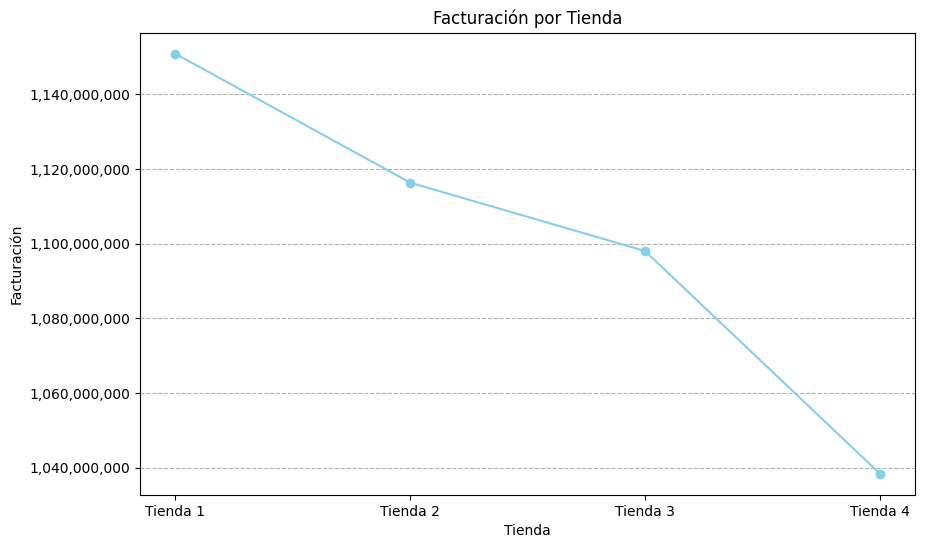

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de las tiendas desde las URLs
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

try:
    # Leer archivos CSV y convertirlos en DataFrames
    tienda1 = pd.read_csv(url_tienda1)
    tienda2 = pd.read_csv(url_tienda2)
    tienda3 = pd.read_csv(url_tienda3)
    tienda4 = pd.read_csv(url_tienda4)
except Exception as e:
    print(f"Error al cargar los datos: {e}")
    exit()  # Salir del script si hay un error al cargar los datos



# Calcular la facturación para cada tienda
def calcular_facturacion(tienda_df, columna_precio="Precio"): # Establezco "Precio" como valor por defecto

    if columna_precio in tienda_df.columns: #Verifico si la columna precio existe
        return tienda_df[columna_precio].sum()
    else:
        print("Advertencia: No se encontró la columna de precio en el DataFrame.")
        return 0

# Calcular la facturación para cada tienda
facturacion_tienda1 = calcular_facturacion(tienda1)
facturacion_tienda2 = calcular_facturacion(tienda2)
facturacion_tienda3 = calcular_facturacion(tienda3)
facturacion_tienda4 = calcular_facturacion(tienda4)

# Crear un DataFrame con los resultados de facturación
df_facturacion = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Facturación': [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]
})

# Imprimir la tabla de facturación
print("\nFacturación por tienda:\n")
print(df_facturacion.to_string(index=False, formatters={'Facturación': '{:,.2f}'.format}))

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.plot(df_facturacion['Tienda'], df_facturacion['Facturación'], marker='o', color='skyblue', linestyle='-') #cambio a plot
plt.title('Facturación por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación')
plt.grid(axis='y', linestyle='--')  # Agregar una grilla para mejor visualización

# Formatear los valores del eje y con comas para miles
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(x)))

plt.show()  # Mostrar el gráfico

# 3.- Ventas por categorías mas vendidas


Matriz de Ventas por Categoría y Tienda:
Tienda                     Tienda 1     Tienda 2     Tienda 3     Tienda 4  \
Categoría del Producto                                                       
Electrodomésticos       363685200.0  348567800.0  329237900.0  283260200.0   
Electrónicos            429493500.0  410831100.0  410775800.0  409476100.0   
Muebles                 187633700.0  176426300.0  201072100.0  192528900.0   
Total                   980812400.0  935825200.0  941085800.0  885265200.0   

Tienda                         Total  
Categoría del Producto                
Electrodomésticos       1.324751e+09  
Electrónicos            1.660576e+09  
Muebles                 7.576610e+08  
Total                   3.742989e+09  

Tabla de Ventas Totales por Tienda:
     Tienda       Precio
0  Tienda 1  980812400.0
1  Tienda 2  935825200.0
2  Tienda 3  941085800.0
3  Tienda 4  885265200.0


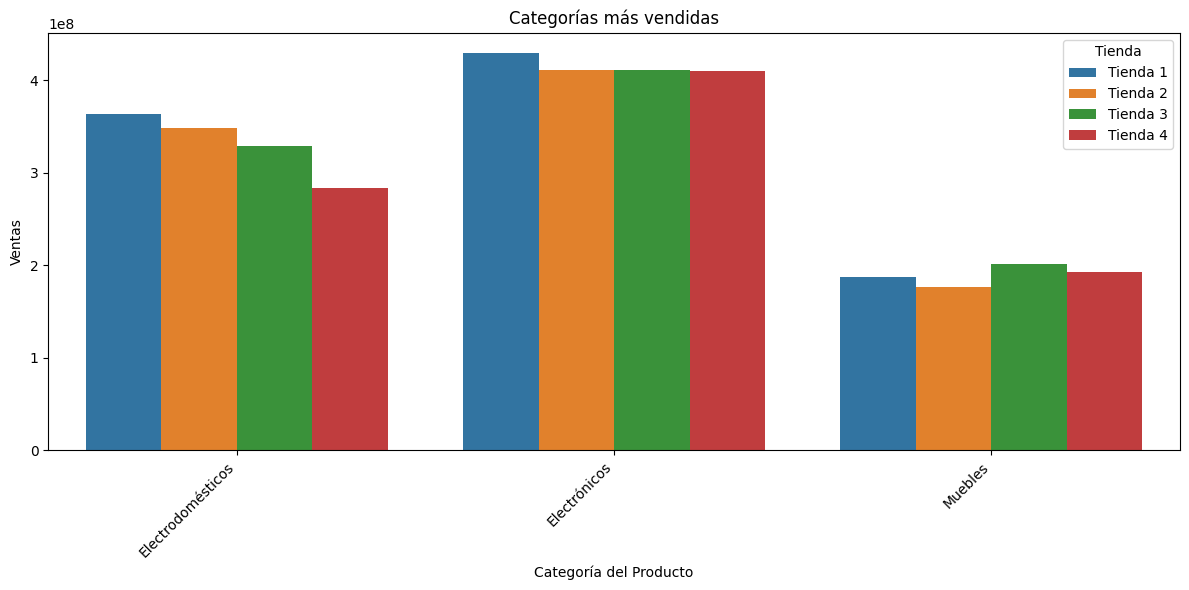

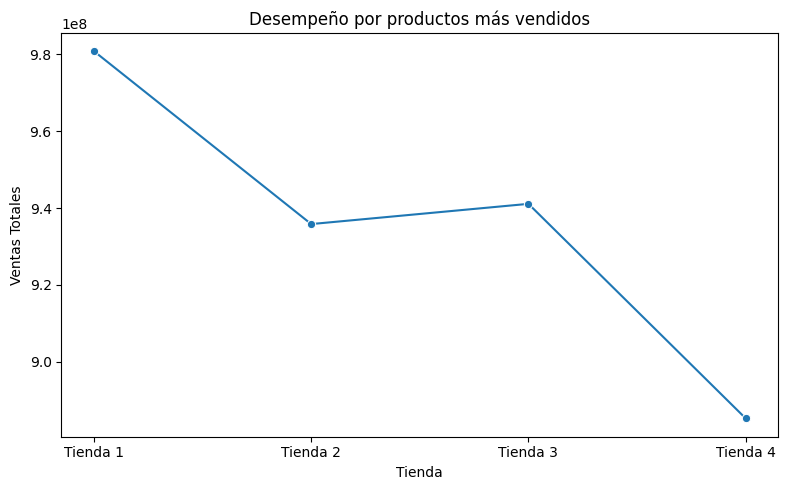

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos de las tiendas desde las URLs
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer archivos CSV y convertirlos en DataFrames
try:
    tienda1 = pd.read_csv(url_tienda1)
    tienda2 = pd.read_csv(url_tienda2)
    tienda3 = pd.read_csv(url_tienda3)
    tienda4 = pd.read_csv(url_tienda4)
except Exception as e:
    print(f"Error al leer los archivos CSV: {e}")
    # Decidir cómo manejar el error (por ejemplo, salir del programa)
    exit()

# Función para calcular las ventas por categoría de una tienda
def calcular_ventas_por_categoria(tienda_df, nombre_tienda, categorias_seleccionadas):
    """
    Calcula las ventas por categoría de una tienda, filtrando por categorías seleccionadas.

    Args:
        tienda_df (pd.DataFrame): DataFrame de la tienda.
        nombre_tienda (str): Nombre de la tienda.
        categorias_seleccionadas (list): Lista de categorías a incluir.

    Returns:
        pd.DataFrame: Ventas por categoría con columna 'Tienda', filtrado por categorías.
    """
    ventas_por_categoria = tienda_df[tienda_df['Categoría del Producto'].isin(categorias_seleccionadas)].groupby('Categoría del Producto')['Precio'].sum().reset_index()
    ventas_por_categoria['Tienda'] = nombre_tienda
    return ventas_por_categoria

# Categorías seleccionadas
categorias_seleccionadas = ['Electrodomésticos', 'Electrónicos', 'Instrumentos Musicales', 'Muebles']

# Calcular las ventas por categoría para cada tienda, filtrando por las categorías seleccionadas
ventas_categoria_tienda1 = calcular_ventas_por_categoria(tienda1, "Tienda 1", categorias_seleccionadas)
ventas_categoria_tienda2 = calcular_ventas_por_categoria(tienda2, "Tienda 2", categorias_seleccionadas)
ventas_categoria_tienda3 = calcular_ventas_por_categoria(tienda3, "Tienda 3", categorias_seleccionadas)
ventas_categoria_tienda4 = calcular_ventas_por_categoria(tienda4, "Tienda 4", categorias_seleccionadas)

# Concatenar los DataFrames de ventas por categoría de todas las tiendas
ventas_por_categoria_todas = pd.concat([ventas_categoria_tienda1, ventas_categoria_tienda2, ventas_categoria_tienda3, ventas_categoria_tienda4])

# Calcular el total de ventas por tienda
total_ventas_por_tienda = ventas_por_categoria_todas.groupby('Tienda')['Precio'].sum().reset_index()

# Crear la matriz (pivot table)
matriz_ventas = ventas_por_categoria_todas.pivot_table(index='Categoría del Producto', columns='Tienda', values='Precio', aggfunc='sum', margins=True, margins_name='Total')

# Imprimir la matriz
print("\nMatriz de Ventas por Categoría y Tienda:")
print(matriz_ventas)

# Imprimir la tabla de ventas totales por tienda
print("\nTabla de Ventas Totales por Tienda:")
print(total_ventas_por_tienda)

# Crear el gráfico de barras para las ventas por categoría y tienda
plt.figure(figsize=(12, 6))
sns.barplot(x='Categoría del Producto', y='Precio', hue='Tienda', data=ventas_por_categoria_todas)
plt.title('Categorías más vendidas')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Crear el gráfico de líneas para el total de ventas por tienda
plt.figure(figsize=(8, 5))
sns.lineplot(x='Tienda', y='Precio', data=total_ventas_por_tienda, marker='o') # Se agrega marker='o' para resaltar los puntos
plt.title('Desempeño por productos más vendidos')
plt.xlabel('Tienda')
plt.ylabel('Ventas Totales')
plt.tight_layout()
plt.show()


# 4. Calificación de las tiendas


El promedio de calificación de la tienda Tienda 1 es: 3.98
El promedio de calificación de la tienda Tienda 2 es: 4.04
El promedio de calificación de la tienda Tienda 3 es: 4.05
El promedio de calificación de la tienda Tienda 4 es: 4.00


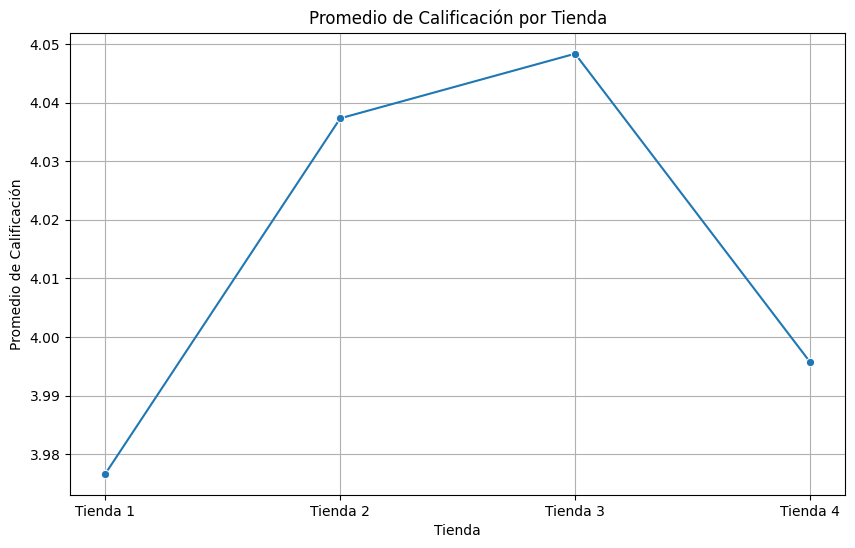

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos de las tiendas desde las URLs
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Función para calcular el promedio de calificación de una tienda
def calcular_promedio_calificacion(tienda_df, nombre_tienda):

    if 'Calificación' not in tienda_df.columns:
        print(f"Advertencia: La columna 'Calificación' no existe en los datos de {nombre_tienda}. No se puede calcular el promedio.")
        return None  # Retorna None para indicar que no se pudo calcular el promedio

    promedio_calificacion = tienda_df['Calificación'].mean()
    print(f"El promedio de calificación de la tienda {nombre_tienda} es: {promedio_calificacion:.2f}")
    return promedio_calificacion

# Calcular el promedio de calificación para cada tienda
promedio_tienda1 = calcular_promedio_calificacion(tienda1, "Tienda 1")
promedio_tienda2 = calcular_promedio_calificacion(tienda2, "Tienda 2")
promedio_tienda3 = calcular_promedio_calificacion(tienda3, "Tienda 3")
promedio_tienda4 = calcular_promedio_calificacion(tienda4, "Tienda 4")

# Crear un DataFrame para el gráfico
data = {
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Promedio de Calificación': [promedio_tienda1, promedio_tienda2, promedio_tienda3, promedio_tienda4]
}
df_promedios = pd.DataFrame(data)

# Eliminar las tiendas donde no se pudo calcular el promedio
df_promedios = df_promedios.dropna()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x='Tienda', y='Promedio de Calificación', marker='o', data=df_promedios) #Se agrega el marker='o'
plt.title('Promedio de Calificación por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Promedio de Calificación')
plt.grid(True) # Agrega la grilla
plt.show()

# 5. Productos más y menos vendidos


Reporte de la Tienda 1:

Producto más vendido: Microondas (Cantidad: 60, Valor: 34,761,500.00, Porcentaje del total: 29.13%)
Producto menos vendido: Auriculares con micrófono (Cantidad: 33, Valor: 4,730,800.00, Porcentaje del total: 20.89%)

Reporte de la Tienda 2:

Producto más vendido: Iniciando en programación (Cantidad: 65, Valor: 3,127,800.00, Porcentaje del total: 33.33%)
Producto menos vendido: Juego de mesa (Cantidad: 32, Valor: 5,811,900.00, Porcentaje del total: 18.29%)

Reporte de la Tienda 3:

Producto más vendido: Kit de bancas (Cantidad: 57, Valor: 16,699,800.00, Porcentaje del total: 30.32%)
Producto menos vendido: Bloques de construcción (Cantidad: 35, Valor: 1,237,200.00, Porcentaje del total: 17.59%)

Reporte de la Tienda 4:

Producto más vendido: Cama box (Cantidad: 62, Valor: 32,946,300.00, Porcentaje del total: 31.16%)
Producto menos vendido: Guitarra eléctrica (Cantidad: 33, Valor: 25,823,100.00, Porcentaje del total: 20.00%)


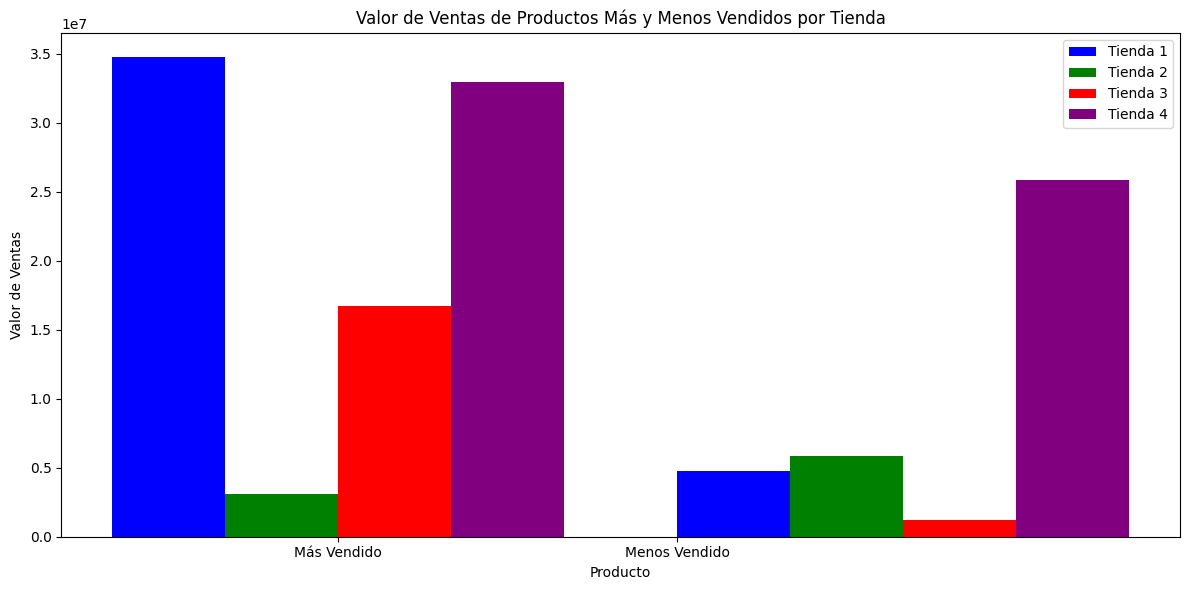

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de las tiendas desde las URLs
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url_tienda1)
tienda2 = pd.read_csv(url_tienda2)
tienda3 = pd.read_csv(url_tienda3)
tienda4 = pd.read_csv(url_tienda4)

# Agregar una columna 'Tienda' para identificar el origen de los datos
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenar los DataFrames de todas las tiendas
todas_las_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Función para encontrar el producto más y menos vendido en una tienda
def reporte_tienda(tienda_df, nombre_tienda):

    # Calcular las ventas por producto en la tienda
    ventas_por_producto = tienda_df['Producto'].value_counts()

    # Calcular el valor de las ventas por producto
    valor_ventas_por_producto = tienda_df.groupby('Producto')['Precio'].sum()

    # Calcular el total de ventas de cada producto en todas las tiendas
    total_ventas_por_producto = todas_las_tiendas['Producto'].value_counts()
    total_valor_ventas_por_producto = todas_las_tiendas.groupby('Producto')['Precio'].sum()

    # Encontrar el producto más vendido
    producto_mas_vendido = ventas_por_producto.idxmax()
    cantidad_mas_vendido = ventas_por_producto.max()
    valor_mas_vendido = valor_ventas_por_producto[producto_mas_vendido]

    # Calcular el porcentaje de ventas del producto más vendido respecto al total
    porcentaje_mas_vendido = (cantidad_mas_vendido / total_ventas_por_producto[producto_mas_vendido]) * 100

    # Encontrar el producto menos vendido
    producto_menos_vendido = ventas_por_producto.idxmin()
    cantidad_menos_vendido = ventas_por_producto.min()
    valor_menos_vendido = valor_ventas_por_producto[producto_menos_vendido]

    # Calcular el porcentaje de ventas del producto menos vendido respecto al total
    porcentaje_menos_vendido = (cantidad_menos_vendido / total_ventas_por_producto[producto_menos_vendido]) * 100

    # Imprimir el reporte
    print(f"\nReporte de la {nombre_tienda}:\n")
    print(f"Producto más vendido: {producto_mas_vendido} (Cantidad: {cantidad_mas_vendido}, Valor: {valor_mas_vendido:,.2f}, Porcentaje del total: {porcentaje_mas_vendido:.2f}%)")
    print(f"Producto menos vendido: {producto_menos_vendido} (Cantidad: {cantidad_menos_vendido}, Valor: {valor_menos_vendido:,.2f}, Porcentaje del total: {porcentaje_menos_vendido:.2f}%)")

    return producto_mas_vendido, valor_mas_vendido, producto_menos_vendido, valor_menos_vendido

# Aplicar la función a cada tienda y guardar los resultados
producto_mas_vendido1, valor_mas_vendido1, producto_menos_vendido1, valor_menos_vendido1 = reporte_tienda(tienda1, 'Tienda 1')
producto_mas_vendido2, valor_mas_vendido2, producto_menos_vendido2, valor_menos_vendido2 = reporte_tienda(tienda2, 'Tienda 2')
producto_mas_vendido3, valor_mas_vendido3, producto_menos_vendido3, valor_menos_vendido3 = reporte_tienda(tienda3, 'Tienda 3')
producto_mas_vendido4, valor_mas_vendido4, producto_menos_vendido4, valor_menos_vendido4 = reporte_tienda(tienda4, 'Tienda 4')

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

# Ancho de las barras
bar_width = 0.2

# Posiciones de las barras para cada tienda
r1 = [0, 1] # Posiciones para los productos más y menos vendidos de la Tienda 1
r2 = [x + bar_width for x in r1] # Posiciones para los productos más y menos vendidos de la Tienda 2
r3 = [x + bar_width for x in r2] # Posiciones para los productos más y menos vendidos de la Tienda 3
r4 = [x + bar_width for x in r3] # Posiciones para los productos más y menos vendidos de la Tienda 4

# Crear las barras para cada tienda
ax.bar(r1, [valor_mas_vendido1, valor_menos_vendido1], width=bar_width, label='Tienda 1', color='blue')
ax.bar(r2, [valor_mas_vendido2, valor_menos_vendido2], width=bar_width, label='Tienda 2', color='green')
ax.bar(r3, [valor_mas_vendido3, valor_menos_vendido3], width=bar_width, label='Tienda 3', color='red')
ax.bar(r4, [valor_mas_vendido4, valor_menos_vendido4], width=bar_width, label='Tienda 4', color='purple')

# Añadir etiquetas y título
ax.set_xlabel('Producto')
ax.set_ylabel('Valor de Ventas')
ax.set_title('Valor de Ventas de Productos Más y Menos Vendidos por Tienda')
ax.set_xticks([bar_width * 1.5, bar_width * 4.5])  # Ajustar las posiciones de las etiquetas del eje x
ax.set_xticklabels(['Más Vendido', 'Menos Vendido']) # Etiquetas del eje x
ax.legend()

plt.tight_layout()
plt.show()

# 6. Costo envío promedio por tienda


Resultados de envíos por tienda:

            Cant      Subtotal Porcentaje
Tienda 1  2359.0 61,377,900.00     26.15%
Tienda 2  2359.0 59,485,100.00     25.35%
Tienda 3  2359.0 58,516,600.00     24.93%
Tienda 4  2358.0 55,317,400.00     23.57%


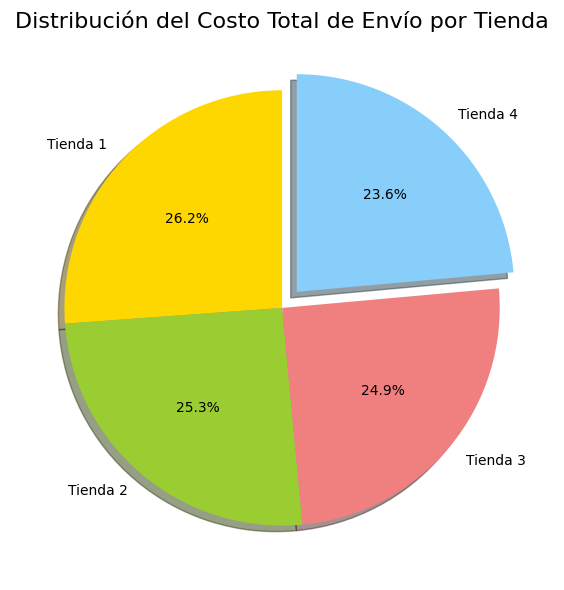

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de las tiendas desde las URLs
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

try:
    # Leer archivos CSV y convertirlos en DataFrames
    tienda1 = pd.read_csv(url_tienda1)
    tienda2 = pd.read_csv(url_tienda2)
    tienda3 = pd.read_csv(url_tienda3)
    tienda4 = pd.read_csv(url_tienda4)
except Exception as e:
    print(f"Error al cargar los datos: {e}")
    exit()  # Salir del script si hay un error al cargar los datos

# Calcular la información de envíos para cada tienda
def calcular_info_envios(tienda_df):

    cantidad_envios = len(tienda_df)
    costo_total_envio = tienda_df['Costo de envío'].sum() if 'Costo de envío' in tienda_df.columns else 0
    return pd.Series({
        'Cant': cantidad_envios,
        'Subtotal': costo_total_envio,
    })

# Calcular la información de envíos para cada tienda
info_envios_tiendas = [calcular_info_envios(tienda) for tienda in [tienda1, tienda2, tienda3, tienda4]]

# Calcular el total de envíos y el costo total de envío para todas las tiendas
total_envios = sum(info_envios['Cant'] for info_envios in info_envios_tiendas)
costo_total_general = sum(info_envios['Subtotal'] for info_envios in info_envios_tiendas)

# Calcular el porcentaje del total para cada tienda
for info_envios in info_envios_tiendas:
    info_envios['Porcentaje'] = (info_envios['Subtotal'] / costo_total_general) * 100 if costo_total_general else 0

# Crear un DataFrame con la información de envíos
df_info_envios = pd.DataFrame(info_envios_tiendas, index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])

# Imprimir el DataFrame
print("\nResultados de envíos por tienda:\n")
print(df_info_envios.to_string(formatters={
    'Subtotal': '{:,.2f}'.format,
    'Porcentaje': '{:.2f}%'.format
}))

# Crear el gráfico de torta simple
fig, ax = plt.subplots(figsize=(8, 6))

# Datos para el gráfico de torta
sizes = df_info_envios['Subtotal']
labels = df_info_envios.index
explode = (0, 0, 0, 0.1)  # Explode la cuarta porción (Tienda 4)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Crear el gráfico de torta
wedges, texts, autotexts = ax.pie(sizes,
                                  explode=explode,
                                  labels=labels,
                                  autopct='%1.1f%%',
                                  shadow=True,
                                  startangle=90,
                                  colors=colors)

ax.set_title('Distribución del Costo Total de Envío por Tienda', fontsize=16)

# Mejorar la apariencia de las etiquetas
for text in texts:
    text.set_color('black')
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

# 7.- Desempeño vendedores por tienda


Mejor y Peor Desempeño de Vendedores por Tienda:

       Vendedor Mejor Tienda    Mejor Venta Peor Tienda    Peor Venta
  Felipe Santos     Tienda 4  95,432,000.00    Tienda 3 80,295,300.00
Izabela de León     Tienda 1  93,776,500.00    Tienda 3 82,141,000.00
  Maria Alfonso     Tienda 1 101,528,700.00    Tienda 4 73,365,900.00
  Juliana Costa     Tienda 2  87,367,800.00    Tienda 4 79,247,800.00
    Pedro Gomez     Tienda 2  90,140,400.00    Tienda 4 66,371,900.00
  Rafael Acosta     Tienda 1  96,271,300.00    Tienda 4 66,781,900.00
 Juan Fernandez     Tienda 4  86,497,500.00    Tienda 2 65,694,300.00
  Lucas Olivera     Tienda 1  84,882,800.00    Tienda 3 69,247,700.00
  Camila Rivera     Tienda 3  82,385,700.00    Tienda 2 66,728,800.00
Beatriz Morales     Tienda 2  87,543,000.00    Tienda 4 56,301,900.00
 Blanca Ramirez     Tienda 4  78,404,900.00    Tienda 2 68,022,700.00
 Santiago Silva     Tienda 3  79,817,900.00    Tienda 4 66,510,600.00
Ángel Rodriguez     Tienda 2  81,864,50

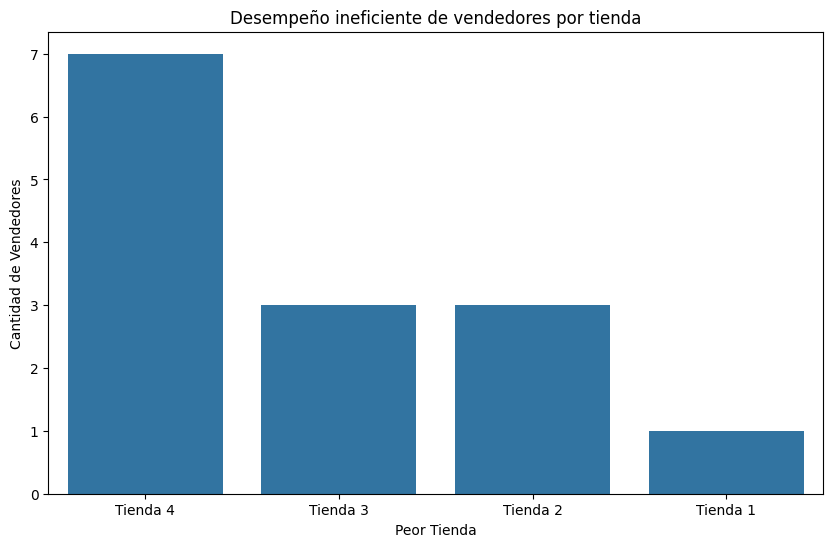

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos de las tiendas desde las URLs
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

try:
    # Leer archivos CSV y convertirlos en DataFrames
    tienda1_df = pd.read_csv(url_tienda1)
    tienda2_df = pd.read_csv(url_tienda2)
    tienda3_df = pd.read_csv(url_tienda3)
    tienda4_df = pd.read_csv(url_tienda4)
except Exception as e:
    print(f"Error al cargar los datos: {e}")
    exit()  # Salir del script si hay un error al cargar los datos

# Agregar una columna 'Tienda' a cada DataFrame para identificar la tienda de origen
tienda1_df['Tienda'] = 'Tienda 1'
tienda2_df['Tienda'] = 'Tienda 2'
tienda3_df['Tienda'] = 'Tienda 3'
tienda4_df['Tienda'] = 'Tienda 4'

# Concatenar los DataFrames de las tiendas
df_tiendas = pd.concat([tienda1_df, tienda2_df, tienda3_df, tienda4_df], ignore_index=True)

# Calcular el total de ventas por vendedor y tienda
df_ventas_vendedor_tienda = df_tiendas.groupby(['Vendedor', 'Tienda'])['Precio'].sum().reset_index()

# Crear una tabla pivote para mostrar las ventas de cada vendedor en cada tienda
tabla_ventas_pivot = df_ventas_vendedor_tienda.pivot_table(index='Vendedor', columns='Tienda', values='Precio', fill_value=0)

# Calcular el total de ventas por vendedor
tabla_ventas_pivot['Total de Ventas'] = tabla_ventas_pivot.sum(axis=1)

# Calcular el ranking basado en el total de ventas
tabla_ventas_pivot['Ranking'] = tabla_ventas_pivot['Total de Ventas']
tabla_ventas_pivot = tabla_ventas_pivot.sort_values(by='Ranking', ascending=False)

# Agregar columna de posición
tabla_ventas_pivot['Posición'] = range(1, len(tabla_ventas_pivot) + 1)

# Reordenar las columnas para la presentación final, excluyendo 'Cantidad de Tiendas' y 'Ranking'
tabla_ranking_final = tabla_ventas_pivot.reset_index()[['Posición', 'Vendedor', 'Total de Ventas', 'Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']]

# Calcular la mejor y peor tienda para cada vendedor
def mejor_peor_tienda(row):
    tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
    ventas = [row['Tienda 1'], row['Tienda 2'], row['Tienda 3'], row['Tienda 4']]
    mejor_venta = max(ventas)
    peor_venta = min(ventas)
    mejor_tienda_idx = ventas.index(mejor_venta)
    peor_tienda_idx = ventas.index(peor_venta)
    return pd.Series([tiendas[mejor_tienda_idx], mejor_venta, tiendas[peor_tienda_idx], peor_venta])

tabla_mejor_peor = tabla_ventas_pivot.apply(mejor_peor_tienda, axis=1)
tabla_mejor_peor.columns = ['Mejor Tienda', 'Mejor Venta', 'Peor Tienda', 'Peor Venta']
tabla_mejor_peor = tabla_mejor_peor.reset_index()[['Vendedor', 'Mejor Tienda', 'Mejor Venta', 'Peor Tienda', 'Peor Venta']]

# Contar la frecuencia de cada 'Peor Tienda'
conteo_peor_tienda = tabla_mejor_peor['Peor Tienda'].value_counts().reset_index()
conteo_peor_tienda.columns = ['Peor Tienda', 'Cantidad de Vendedores']

# Imprimir la segunda tabla
print("\nMejor y Peor Desempeño de Vendedores por Tienda:\n")
print(tabla_mejor_peor.to_string(index=False, formatters={
    'Mejor Venta': '{:,.2f}'.format,
    'Peor Venta': '{:,.2f}'.format
}))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Peor Tienda', y='Cantidad de Vendedores', data=conteo_peor_tienda)
plt.title('Desempeño ineficiente de vendedores por tienda')
plt.xlabel('Peor Tienda')
plt.ylabel('Cantidad de Vendedores')
plt.show()

# 8.- Ingresos Netos


Facturación y Neto por Tienda:

  Tienda      Facturación             Neto
Tienda 1 1,150,880,400.00 1,089,502,500.00
Tienda 2 1,116,343,500.00 1,056,858,400.00
Tienda 3 1,098,019,600.00 1,039,503,000.00
Tienda 4 1,038,375,700.00   983,058,300.00


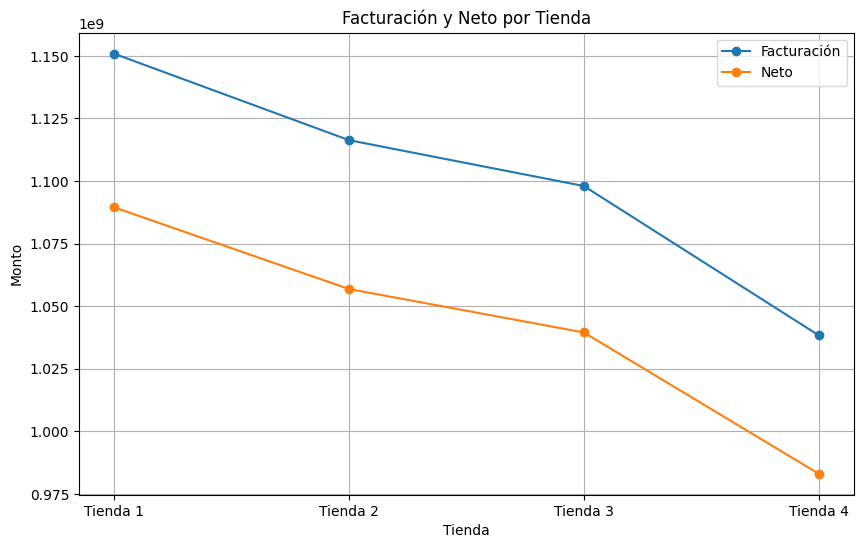

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos de las tiendas desde las URLs
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

try:
    # Leer archivos CSV y convertirlos en DataFrames
    tienda1 = pd.read_csv(url_tienda1)
    tienda2 = pd.read_csv(url_tienda2)
    tienda3 = pd.read_csv(url_tienda3)
    tienda4 = pd.read_csv(url_tienda4)
except Exception as e:
    print(f"Error al cargar los datos: {e}")
    exit()  # Salir del script si hay un error al cargar los datos

# Calcular la facturación y el neto para cada tienda
def calcular_resultados(tienda_df):

    facturacion = tienda_df['Precio'].sum() if 'Precio' in tienda_df.columns else 0
    costo_envio = tienda_df['Costo de envío'].sum() if 'Costo de envío' in tienda_df.columns else 0
    neto = facturacion - costo_envio
    return pd.Series({
        'Facturación': facturacion,
        'Neto': neto
    })

# Calcular los resultados para cada tienda
resultados_tienda1 = calcular_resultados(tienda1)
resultados_tienda2 = calcular_resultados(tienda2)
resultados_tienda3 = calcular_resultados(tienda3)
resultados_tienda4 = calcular_resultados(tienda4)

# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Facturación': [resultados_tienda1['Facturación'], resultados_tienda2['Facturación'], resultados_tienda3['Facturación'], resultados_tienda4['Facturación']],
    'Neto': [resultados_tienda1['Neto'], resultados_tienda2['Neto'], resultados_tienda3['Neto'], resultados_tienda4['Neto']]
})

# Imprimir la tabla
print("\nFacturación y Neto por Tienda:\n")
print(df_resultados.to_string(index=False, formatters={
    'Facturación': '{:,.2f}'.format,
    'Neto': '{:,.2f}'.format
}))

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df_resultados['Tienda'], df_resultados['Facturación'], marker='o', label='Facturación')
plt.plot(df_resultados['Tienda'], df_resultados['Neto'], marker='o', label='Neto')
plt.title('Facturación y Neto por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Monto')
plt.legend()
plt.grid(True)
plt.show()

# 9.- Total ponderado pagos en cuotas

Tabla Cantidad de Cuotas Otorgadas por Tienda:
cantidad de cuotas   2    3    4    5   6   7   8   9    10  11  12  14  15  17  18  20  21  24
tienda                                                                                         
Tienda 1            257  229  147  131  86  40  96  11  142   2  10   2   0   0   1   0   0   1
Tienda 2            296  231  147  129  78  35  76  18  144   0   4   1   2   1   0   3   1   1
Tienda 3            263  225  175  122  99  45  91   9  142   2   5   1   1   0   0   1   1   1
Tienda 4            271  233  154  110  97  38  98   8  145   0   3   0   1   0   1   0   0   0

Tabla de Total Ponderado de Cuotas por Tienda:
          Total Ponderado
Tienda 1           5739.0
Tienda 2           5655.0
Tienda 3           5825.0
Tienda 4           5630.0


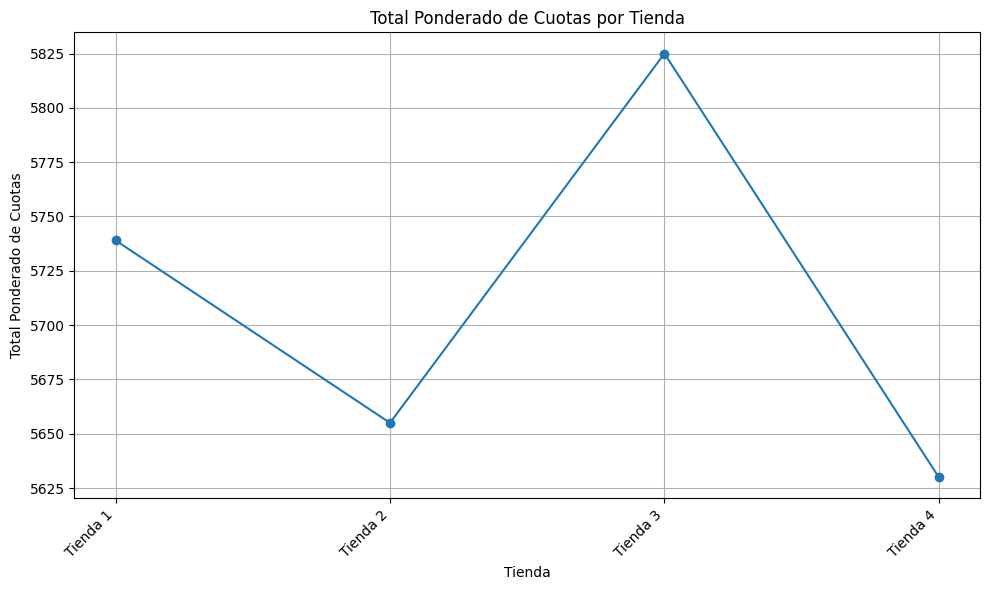

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de las tiendas desde las URLs
url_tienda1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url_tienda2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_tienda3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_tienda4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

try:
    # Leer archivos CSV y convertirlos en DataFrames
    tienda1_df = pd.read_csv(url_tienda1)
    tienda2_df = pd.read_csv(url_tienda2)
    tienda3_df = pd.read_csv(url_tienda3)
    tienda4_df = pd.read_csv(url_tienda4)
except Exception as e:
    print(f"Error al cargar los datos: {e}")
    exit()  # Salir del script si hay un error al cargar los datos

# Agregar una columna 'Tienda' a cada DataFrame para identificar la tienda de origen
tienda1_df['Tienda'] = 'Tienda 1'
tienda2_df['Tienda'] = 'Tienda 2'
tienda3_df['Tienda'] = 'Tienda 3'
tienda4_df['Tienda'] = 'Tienda 4'

# Concatenar los DataFrames de las tiendas
df_tiendas = pd.concat([tienda1_df, tienda2_df, tienda3_df, tienda4_df], ignore_index=True)

# Limpiar los nombres de las columnas: eliminar espacios y convertir a minúsculas
df_tiendas.columns = df_tiendas.columns.str.strip().str.lower()

# Verificar si la columna 'cantidad de cuotas' existe
if 'cantidad de cuotas' not in df_tiendas.columns:
    print("Error: La columna 'cantidad de cuotas' no existe en el DataFrame.")
    print("Por favor, verifique el nombre de la columna que contiene la información sobre las cuotas e inténtelo de nuevo.")
    exit()

# Calcular la cantidad de cuotas por tienda
tabla_cuotas_tienda = df_tiendas.groupby('tienda')['cantidad de cuotas'].value_counts().unstack(fill_value=0)

# Eliminar la columna '1' si existe
if 1 in tabla_cuotas_tienda.columns:
    tabla_cuotas_tienda = tabla_cuotas_tienda.drop(columns=1, errors='ignore')

# Calcular el total ponderado de cuotas por tienda
tabla_total_ponderado = pd.DataFrame()
for tienda in tabla_cuotas_tienda.index:
    total_ponderado = 0
    for cuota in tabla_cuotas_tienda.columns:
        # Asegurarse de que cuota no sea 'Total' antes de la conversión
        if cuota != 'Total':
            total_ponderado += cuota * tabla_cuotas_tienda.loc[tienda, cuota]
    tabla_total_ponderado.loc[tienda, 'Total Ponderado'] = total_ponderado

# Imprimir la tabla resultante
print("Tabla Cantidad de Cuotas Otorgadas por Tienda:")
print(tabla_cuotas_tienda.to_string())
print("\nTabla de Total Ponderado de Cuotas por Tienda:")
print(tabla_total_ponderado.to_string())

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.plot(tabla_total_ponderado.index, tabla_total_ponderado['Total Ponderado'], marker='o', linestyle='-')
plt.title('Total Ponderado de Cuotas por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Total Ponderado de Cuotas')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.grid(True)  # Mostrar la cuadrícula para facilitar la lectura
plt.tight_layout()  # Ajustar el diseño para evitar recortes
plt.show()  # Mostrar el gráfico

# INFORME FINAL

##A.- Introducción:

  El objetivo de este trabajo, es ayudar al Sr. Juan, propietario de 4 tiendas, a decidir cuál de ellas vender para invertir en un nuevo negocio.

##B.- Plan general:

  Mediante el uso de lenguaje Python, se estructurán códigos para efectuar  revisión de los resultados de las cuatro tiendas a poartir de los archivos que contienen los movimientos de ventas de dichas tiendas (tienda1, tienda2, tienda3 y tienda4).

##C.- Objetivo:

  Determinar que tienda tiene el rendimiento mas bajo.

##D.- Metodología:

  Para el análisis de los antecedentes aportados, se crearon códigos en ambiente Python, cuyos resultados se acompañan con gráficos explicativos para viualizar aspectos económicos preponderantes para la toma de decisión
  
  Los factores analizados fueron.

  a) Los ingresos totales de las tiendas.

  b) Las categorías de productos más y menos vendidas.

  c) Las calificaciones promedio de los clientes por tienda.

  d) Los productos más y menos vendidos.

  e) El coste de envío promedio para cada tienda.


##E.- Resultados:


###  a) Tiempo en operación de las tiendas

Este análisis buscaba descartar posibles diferencias de tiempos de operación de cada tienda, que requirieran ponderar valores por tiempo. Se compararon las fechas de la compra mas antigüa en cada una de ellas y el resultado fue que todas habían comenzado en la misma fecha, por lo que los datos son lineales y se continuó con el análisis.

###  b) Los ingresos totales de las tiendas.

  De acuerdo con la siguiente tabla entregada por el código, el resultado indica que la tienda 4 tiene el mas bajo rendimiento en ingresos.

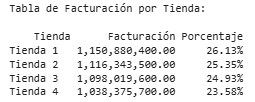



###  c) Rendimiento en las categorías mas vendidas.

Este segundo análisis relacionado con las categorías mas vendidas, se seleccionaron los 3 productos mas vendidos y el desempeño de cada tienda en cada uno de ellos.
El resultado es que la Tienda 4 es la que presenta el menor desempeño.

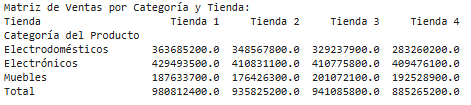

![Desempeño por productos mas vendidos - gráfico.png]

###  d) Las calificaciones promedio de los clientes por tienda.

Los resultados ubican a la tienda 1 con la menor calificación y la tienda 4 le sigue, sin embargo las variaciones indican que están todas muy parejas, por lo que este parámetro no arroja diferencias entre ellas.

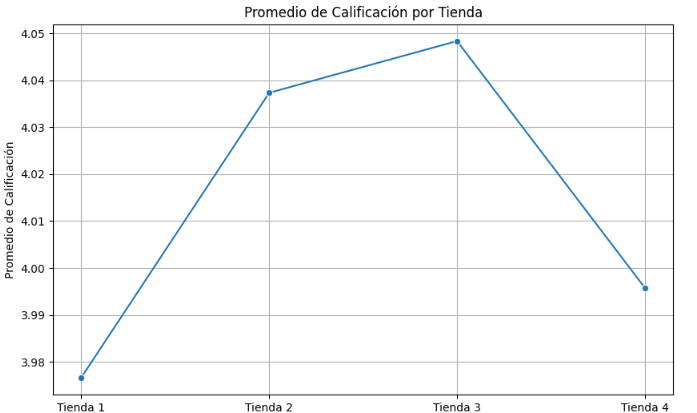


###  e) Los productos más y menos vendidos.

El código empleado permitió determinar cuáles fueron los productos mas y menos vendidos en cada tienda, y la facturación en cada caso.

Se advierte que la tienda 4 muestra el mejor comportamiento (mas parejo) en la facturación de productos mas y menos vendidos, con un total aproximado de 59 millones; en cambio, el peor rendimiento está en la Tienda 2 con un total de 8 Millones.

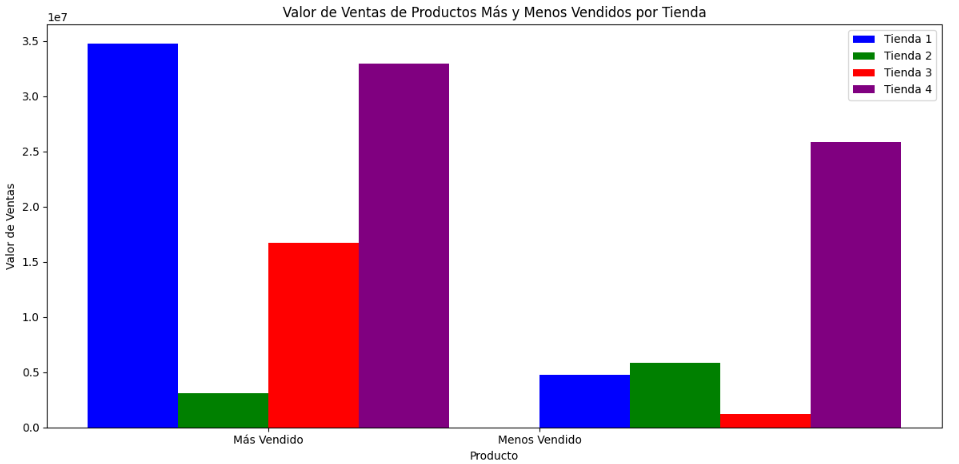


####Tienda 1:

+ mas vendido: Microondas; 60 und, 34,761,500.00; 9.13% del total.

- menos vendido: Auriculares con micrófono; 33 und; 4,730,800.00; 20.89% del total.

####Tienda 2:

+ mas vendido: Iniciando en programación; 65 und, 3,127,800.00; 33.33% del total

- menos vendido: Juego de mesa; 32 und, 5,811,900.00; 18.29% del total

####Tienda 3:

+ mas vendido: Kit de bancas; 57 und; 16,699,800.00; 30.32% del total
- menos vendido: Bloques de construcción; 35 und; 1,237,200.00; 17.59% del total

####Tienda 4:

+ mas vendido: Cama box; 62 und; 32,946,300.00; 31.16% del total
- menos vendido: Guitarra eléctrica; 33 und; 25,823,100.00; : 20.00% del total


###  f) El coste de envío promedio para cada tienda.

En este ítem se hizo un análisis de la cantidad y valor de los envíos de cada tienda y se estableció el porcentaje respecto del total. Cabe señalar que a igualdad de cantidad de envíos, las diferencias no son sustanciales.

La tienda con mayor costo de envío fue la Tienda 1 y la con el menor costo, la Tienda 4.

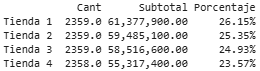

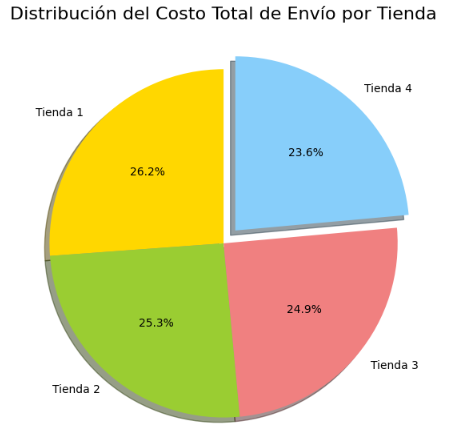

###  g) Desempeño de vendedores por tienda

Este análisis consideró el desempeño en ventas de cada vendedor; como los vendedores trabajaron en diferentes tiendas, se buscó el resultado de la tienda en la que los vendedores obtuvieron sus peores desempeños

De ellas, la Tienda 4 es la que reune la mayor cantidad de vendedores, es decir, es la tienda donde cada vendedor obtuvo los peores resultados.

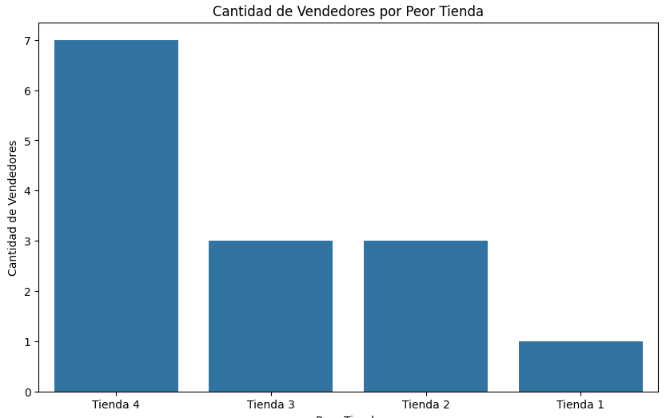


###  h) Ingresos Netos

Se verificaron los ingresos netos de cada cada tienda, restando los costos de envío a la facturación. El gráfico muestra que los ingresos netos de la Tienda 4 son los mas bajos.

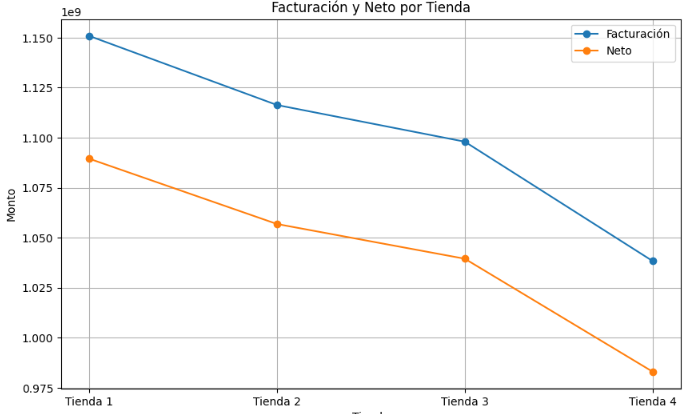


###  i) Total ponderado pagos en cuotas

En concordancia con el anterior análisis, éste muestra un comportamiento similar, con el peor resultado para la Tienda 4.

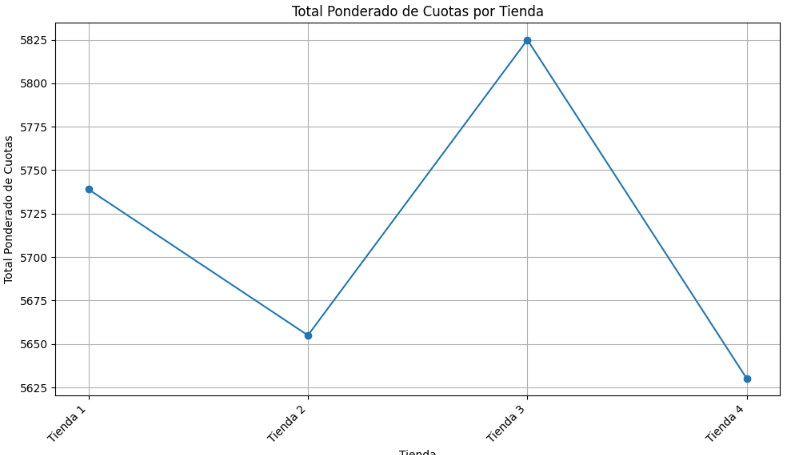


####  E. CONCLUSIÓN

De los resultados obtenidos en los análisis anteriores, se confeccionó una tabla resumen, con valores y ubicación de 1er a 4to puesto. Luego se obtuvo un total ponderado del pueto final, de lo que se obtuvo que la tienda con mejor rendimiento es la Tienda 1 y la que presenta el mas bajo redimiento es la Tienda 4.
En conclusión, se sugiere vender la Tienda 4

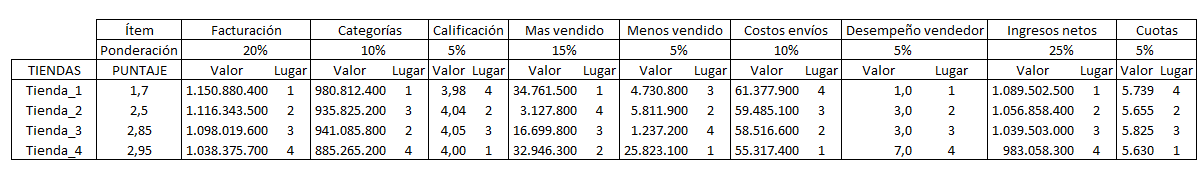